# Business Understanding

In [3]:
pip install --upgrade wordcloud

# Data Understanding

In [4]:
#importing relevant libraries
#standard libraries
import pandas as pd
import numpy as np


#visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from wordcloud import WordCloud
%matplotlib inline



In [5]:
# loading movie data
mov_df = pd.read_csv('movies.csv')
mov_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
#checking the shape of the DataFrame
mov_df.shape

(9742, 3)

We observe that this dataset has a total of 9742 Rows

In [7]:
#Checking the information on the DataFrame
mov_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [8]:
#loading Tags data
tags_df=pd.read_csv('tags.csv')
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [9]:
#checking the shape of the DataFrame
tags_df.shape

(3683, 4)

We can see that we have 3683 Rows in this dataset

In [10]:
#checking the DataFrame information
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [11]:
#loading links data
links_df=pd.read_csv('links.csv')
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [12]:
#checking shape of the DataFrame
links_df.shape

(9742, 3)

We can see that we have a total of 9742 rows in this dataset

In [13]:
#checking links DataFrame information
links_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [14]:
# ratings dataframe
ratings_df = pd.read_csv('ratings.csv')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [15]:
#checking the shape of the DataFrame
ratings_df.shape

(100836, 4)

We find that this dataset contains a total of 100836 rows.

In [16]:
#checking the information on the DataFrame
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


Great, now lets get to preparing our data !

# Data Preparation

For ease of understanding and cleaning, we will merge the movie dataset and the ratings dataset. This will result to a dataset with the movie name, its genre  and its rating.

In [17]:
#Merging movie dataFrame with ratings DataFrame
mov_df= pd.merge(mov_df, ratings_df, on='movieId')
mov_df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


  Since Timestamp is irrelevant for our analysis we will drop the column

In [18]:
#Dropping Timestamp column
mov_df.drop(['timestamp'], axis=1, inplace=True)

In [19]:
#confirming it has been dropped
mov_df.head(2)

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0


In [20]:
#checking DataFrame information
mov_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   movieId  100836 non-null  int64  
 1   title    100836 non-null  object 
 2   genres   100836 non-null  object 
 3   userId   100836 non-null  int64  
 4   rating   100836 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.6+ MB


We can now see that we have one harmonised dataframe that has all columns we may want to use for our analysis




In [21]:
#Checking null count
mov_df.isna().sum()

movieId    0
title      0
genres     0
userId     0
rating     0
dtype: int64

In [22]:
#Checking for duplicates
mov_df.duplicated().sum()

0

Great so we find that we have no missing values and any duplicates in this DataFrame. Lets find out about the other 2 DataFrames.

In [23]:
#Checking for null values in the tags DataFrame
tags_df.isna().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [24]:
#Checking for duplicates in tags DataFrame
tags_df.duplicated().sum()

0

In [25]:
#Checking for duplicates in links DataFrame
links_df.duplicated().sum()

0

In [26]:
#Checking null count
links_df.isna().sum()

movieId    0
imdbId     0
tmdbId     8
dtype: int64

We have found some 8 missing values in the 'tmdbId' column. Considering we have 9742 rows, conisidering these 8 rows as null values wouldnt really affect the genuinity of the dataset with regards to analysis and modelling.   

In [27]:
links_df['tmdbId'].fillna(0, inplace=True)

In [28]:
#Confirming the 8 cells have been replaced by null
links_df.isna().sum()

movieId    0
imdbId     0
tmdbId     0
dtype: int64

In [29]:
# We have userID and timestamp columns in the tags data. Therefore, we can drop the two columns.

# Drop the 'userId' and 'timestamp' columns
tags_df = tags_df.drop(['userId', 'timestamp'], axis=1)

# View the updated DataFrame
tags_df.head()

,movieId,tag
0,60756,funny
1,60756,Highly quotable
2,60756,will ferrell
3,89774,Boxing story
4,89774,MMA


Now lets create a column named Year. We will use feature engineering technique to extract the year in which a movie was released.

In [30]:
# Extract the year from the 'Title' column and create a new column 'Year'
mov_df['Year'] = mov_df['title'].str.extract(r'\((\d{4})\)')

# View the updated DataFrame with the 'Year' column
mov_df.head()

,movieId,title,genres,userId,rating,Year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,1995
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1995
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1995
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1995
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1995


Perfect, now lets merge this DataFrame with the tags DataFrame so that we can have the 'tag' column as well.

In [31]:
#Merging movie dataFrame with tags DataFrame
mov_df= pd.merge(mov_df, tags_df, on='movieId')

#view updated DataFrame
mov_df.head()

,movieId,title,genres,userId,rating,Year,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,1995,pixar
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,1995,pixar
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,1995,fun
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1995,pixar
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1995,pixar


# Exploratory Data Analysis

In [32]:
# EDA: Movie Genres Distribution
genre_counts = mov_df['genres'].str.split('|', expand=True).stack().value_counts()
genre_fig = px.bar(genre_counts, x=genre_counts.index, y=genre_counts.values,
                   labels={'x': 'Genres', 'y': 'Count'}, title='Distribution of Movie Genres')

genre_fig.show()

We can see that the highest number of movies are in the drama genre while the genre with the least is film-Noir.  

In [33]:
# EDA: Rating Distribution
rating_hist = px.histogram(ratings_df, x='rating', title='Distribution of Ratings')
rating_hist.update_xaxes(title_text='Rating')
rating_hist.update_yaxes(title_text='Count')

rating_hist.show()

Highest rating is 4 while lowest is 0.5

In [34]:
mov_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233213 entries, 0 to 233212
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   movieId  233213 non-null  int64  
 1   title    233213 non-null  object 
 2   genres   233213 non-null  object 
 3   userId   233213 non-null  int64  
 4   rating   233213 non-null  float64
 5   Year     233210 non-null  object 
 6   tag      233213 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 22.3+ MB


Let's now find out the top 5 movies and the bottom 5 movies based on ratings

In [35]:
# The average rating for each movie
average_ratings = mov_df.groupby('title')['rating'].mean().reset_index()

# Sorting movies by average rating in ascending order to get the bottom 5
bottom_5_movies = average_ratings.sort_values('rating').head(5)

# Creating interactive bar charts for bottom 5 movies
bottom_5_fig = px.bar(bottom_5_movies, x='rating', y='title', orientation='h',
                      labels={'x': 'Average Rating', 'y': 'Movie Title'},
                      title='Bottom 5 Movies by Average Rating')
# Showing the interactive plots
bottom_5_fig.show()



We observe that the bottom 5 movies have a rating of 0.5

In [36]:
# Sorting movies by average rating in ascending order to get the bottom 5
top_5_movies = average_ratings.sort_values('rating').tail(5)

# Creating interactive bar charts for bottom 5 movies
top_5_fig = px.bar(top_5_movies, x='rating', y='title', orientation='h',
                      labels={'x': 'Average Rating', 'y': 'Movie Title'},
                      title='Top 5 Movies by Average Rating')
# Showing the interactive plots
top_5_fig.show()

We can see that all these movies have a rating of 5, which is the highest rating.

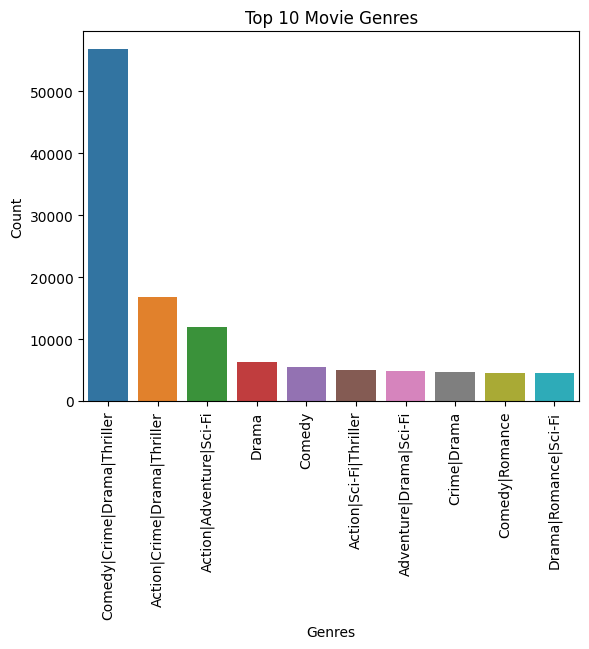

In [37]:

# Bar chart for top genres
genres_counts = mov_df['genres'].value_counts().head(10)
sns.barplot(x=genres_counts.index, y=genres_counts.values)
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Top 10 Movie Genres')
plt.xticks(rotation=90)
plt.show()

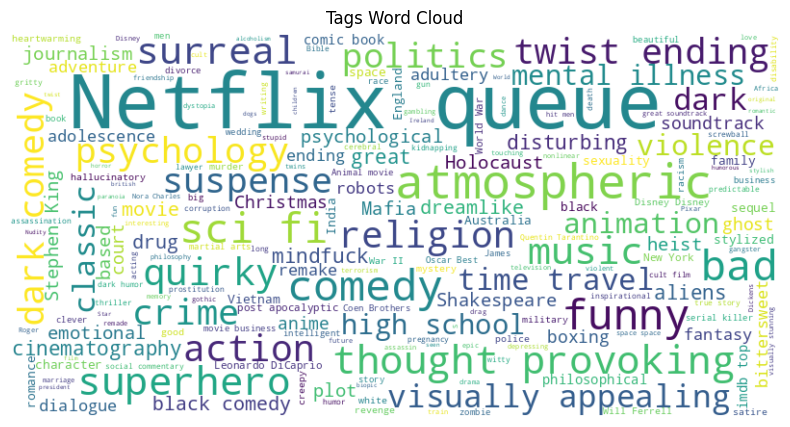

In [38]:
# Word cloud for tags
from wordcloud import WordCloud

tags_text = " ".join(tags_df['tag'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tags_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Tags Word Cloud")
plt.axis('off')
plt.show()